In [1]:
# imports
from solvers import *
from solve_to import *
from shooting import *

import numpy as np
import matplotlib.pyplot as plt


In [44]:
# define a simple ODE
def ode(Y, t, args = ()):
    x, y = Y
    return np.array([y, -x])

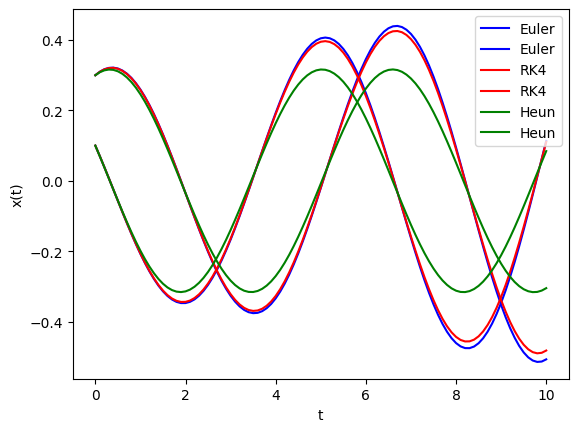

In [45]:
# testing solve_to and solvers

# run each method
def test_solvers():
    # define the initial conditions
    y0 = [0.3, 0.1]
    t0 = 0
    delta_t = 0.1

    # define the final time
    t1 = 10

    # solve the ODE
    Y_euler, t_e = solve_to(ode, y0, t0, t1, delta_t, 'Euler')
    Y_rk4, t_r = solve_to(ode, y0, t0, t1, delta_t, 'RK4')
    Y_lw, t_l = solve_to(ode, y0, t0, t1, delta_t, 'Heun')

    # plot the solution
    plt.plot(t_e, Y_euler, 'b', label='Euler')
    plt.plot(t_r, Y_rk4, 'r', label='RK4')
    plt.plot(t_l, Y_lw, 'g', label='Heun')
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend(loc='best')
    plt.show()

# test the solvers
test_solvers()

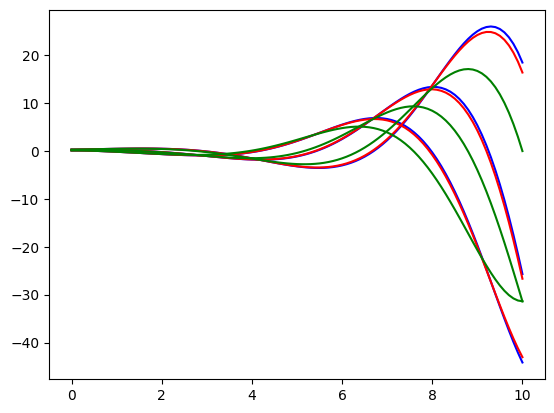

In [46]:
# Test euler step for 3 ode's
def ode3(Y, t, args = ()):
    x, y, z = Y
    return np.array([y, z, -x]) 

# define the initial conditions
y0 = [0.3, 0.1, 0.2]
t0 = 0
delta_t = 0.1

# define the final time
t1 = 10

# solve the ODE
Y_euler, t_e = solve_to(ode3, y0, t0, t1, delta_t, 'Euler')
Y_rk4, t_r = solve_to(ode3, y0, t0, t1, delta_t, 'RK4')
Y_lw, t_l = solve_to(ode3, y0, t0, t1, delta_t, 'Heun')

# plot the solution
plt.plot(t_e, Y_euler, 'b', label='Euler')
plt.plot(t_r, Y_rk4, 'r', label='RK4')
plt.plot(t_l, Y_lw, 'g', label='Heun')





Find the difference in behaviour for the predator prey equations.

KeyboardInterrupt: 

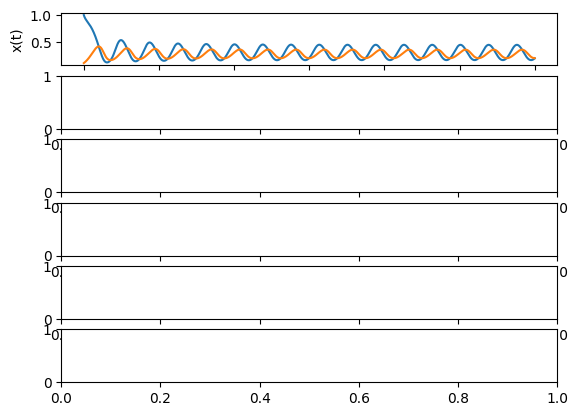

In [47]:
# shooting
a = 1
d = 0.1
b = 0.2

def ode(Y, t, args = (a, b, d)):
    x, y = Y
    return np.array([x*(1-x) - (a*x*y)/(d+x) , b*y*(1- (y/x))])

b_vals = np.linspace(0.24, 0.29, 6)
fig, ax = plt.subplots(len(b_vals), 1)

for i, b in enumerate(b_vals):
    Y, t = solve_to(ode, [1, 0.1], 0, 300, 0.01, 'RK4')
    # For each plot, plot y1(t) and y2(t) on the same plot against t
    ax[i].plot(t, Y, label='b = %.2f' %(b))
    ax[i].set_xlabel('t')
    ax[i].set_ylabel('x(t)')
    ax[i].legend(loc='best')

plt.show()

In [3]:
# define new ode
a = 1
d = 0.1
b = 0.1

def ode(Y, t, args = (a, b, d)):
    a, b, d = args
    x, y = Y
    return np.array([x*(1-x) - (a*x*y)/(d+x) , b*y*(1- (y/x))])

In [ ]:
### test shooting and period ###
Y,t,guess = shooting_dev(ode, [0.4,0.1],'RK4')
plt.show()

In [ ]:
# plot the period
T, Y, t = period(Y,t)
plt.plot(t, Y, label='x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.title('Period = %.2f, starting condition [ %f, 0.1]' %( T, guess))
plt.show()

This script aims to find the starting condition that finds a dy/dt gradient = 0 at t = 100 using the shooting method. By starting with an initial guess and then using the error to scale the guess to approach the solution to a certain tolerance.

This can be achieve much simpler using a shooting function that is built on the fsolve function:

/var/folders/4d/1cd5pk9s6f7_prxws19jm1fw0000gn/T/ipykernel_95641/69392338.py:9: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([x*(1-x) - (a*x*y)/(d+x) , b*y*(1- (y/x))])
/var/folders/4d/1cd5pk9s6f7_prxws19jm1fw0000gn/T/ipykernel_95641/69392338.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return np.array([x*(1-x) - (a*x*y)/(d+x) , b*y*(1- (y/x))])


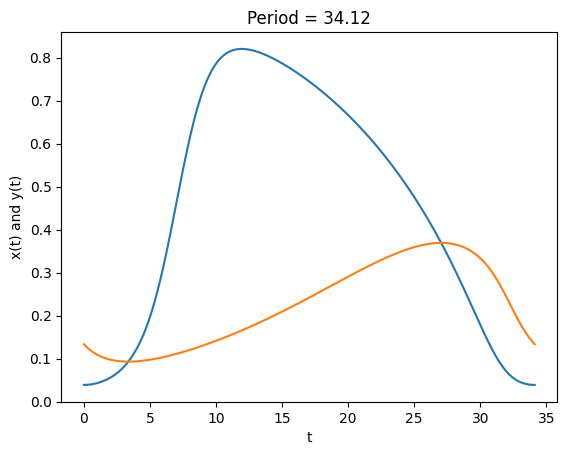

In [4]:
# test shooting function

# get the starting conditions and period
Y, T = shooting(ode, [0.4, 0.1])

# solve for that starting condition
Y, t = solve_to(ode, Y, 0, T, 0.01, 'RK4')

# plot the solution
plt.plot(t, Y)
plt.xlabel('t')
plt.ylabel('x(t) and y(t)')
plt.title('Period = %.2f' %(T))
plt.show()